## web scraping: Liverpool FC - Team
#### use BeautifulSoup4 (using CSS selectors style)
* web: https://www.liverpoolfc.com/team/first-team
* Soup Sieve API: https://facelessuser.github.io/soupsieve/api/
* BeautifulSoup doc: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#

---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* [Chulalongkorn Business School, Thailand](https://www.cbs.chula.ac.th/en/home/)
---

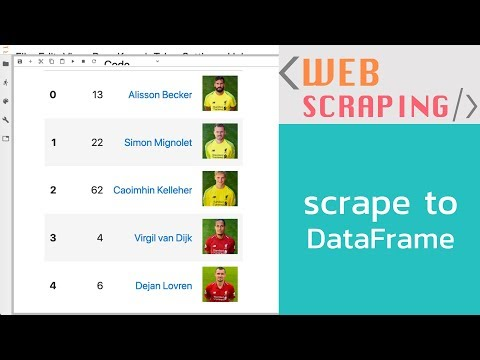

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Y-_t5Hll09I', width=720, height=405)

In [2]:
# conda install beautifulsoup4 lxml requests pillow
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
from PIL import Image # pillow package (Python Image Library)
import io

In [3]:
print(f'pandas version = {pd.__version__}')
print(f'bs4    version = {bs4.__version__}') # beautifulsoup4

pandas version = 0.24.2
bs4    version = 4.7.1


In [4]:
pd.Timestamp.today()

Timestamp('2019-05-25 11:44:32.654193')

In [5]:
url='https://www.liverpoolfc.com/team/first-team'
# url='https://www.manutd.com/en/players-and-staff/legends'
r=requests.get(url)
r.text[:100]

'<!DOCTYPE html>\n<!--[if lt IE 7 ]> <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://openg'

In [6]:
# s = BeautifulSoup(r.text, 'html.parser')
s = BeautifulSoup(r.text, 'lxml')
type(s)

bs4.BeautifulSoup

In [7]:
print(s.prettify())

<!DOCTYPE html>
<!--[if lt IE 7 ]> <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie6 oldie"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie7 oldie"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie8 oldie"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie9"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" id="top">
 <!--<![endif]-->
 <head>
  <script>
   (function(H){H.className=H.className.replace(/\bno-js\b/,'js')})(document.documentElement);

    if (window.history.replaceState && windo

In [8]:
members = s.select('li.team-player-list-item') 
# members = s.find_all('li', {'class': 'team-player-list-item'})

In [9]:
members

[<li class="team-player-list-item">
 <a href="/team/first-team/player/alisson-becker">
 <div class="img-wrap">
 <img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg"/>
 </div>
 <div class="number">13</div>
 <div class="about">
 <div class="name">
 <span>Alisson</span> <span>Becker</span>
 </div>
 </div>
 </a>
 </li>, <li class="team-player-list-item">
 <a href="/team/first-team/player/simon-mignolet">
 <div class="img-wrap">
 <img alt="Simon Mignolet" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg"/>
 </div>
 <div class="number">22</div>
 <div class="about">
 <div class="name">
 <span>Simon</span> <span>Mignolet</span>
 </div>
 </div>
 </a>
 </li>, <li class="team-player-list-item">
 <a href="/team/first-team/player/caoimhin-kelleher">
 <div class="img-wrap">
 <img alt="Caoimhin Kelleher" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/

In [10]:
len(members)

41

In [11]:
members[0]

<li class="team-player-list-item">
<a href="/team/first-team/player/alisson-becker">
<div class="img-wrap">
<img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg"/>
</div>
<div class="number">13</div>
<div class="about">
<div class="name">
<span>Alisson</span> <span>Becker</span>
</div>
</div>
</a>
</li>

In [12]:
print(members[0].prettify())

<li class="team-player-list-item">
 <a href="/team/first-team/player/alisson-becker">
  <div class="img-wrap">
   <img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg"/>
  </div>
  <div class="number">
   13
  </div>
  <div class="about">
   <div class="name">
    <span>
     Alisson
    </span>
    <span>
     Becker
    </span>
   </div>
  </div>
 </a>
</li>



In [13]:
members[0].select_one('a')
# members[0].find('a')

<a href="/team/first-team/player/alisson-becker">
<div class="img-wrap">
<img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg"/>
</div>
<div class="number">13</div>
<div class="about">
<div class="name">
<span>Alisson</span> <span>Becker</span>
</div>
</div>
</a>

In [14]:
members[0].select_one('a')['href']
# members[0].find('a')['href']

'/team/first-team/player/alisson-becker'

In [15]:
members[0].select_one('div.number')
# members[0].find('div', {'class': 'number'})

<div class="number">13</div>

In [16]:
members[0].select_one('div.number').text
# members[0].find('div', {'class': 'number'}).text

'13'

In [17]:
members[0].select_one('div.name')
# members[0].find('div', {'class': 'name'})

<div class="name">
<span>Alisson</span> <span>Becker</span>
</div>

In [18]:
members[0].select_one('div.name').select('span')[0].text
# members[0].find('div', {'class': 'name'}).find_all('span')[0].text

'Alisson'

In [19]:
members[0].select_one('div.name').select('span')[1].text
# members[0].find('div', {'class': 'name'}).find_all('span')[1].text

'Becker'

In [20]:
members[0].select_one('div.name>span')
# members[0].find('div', {'class': 'name'}).find_all('span')[0].text

<span>Alisson</span>

In [21]:
members[0].select('div.name>span')
# members[0].find('div', {'class': 'name'}).find_all('span')

[<span>Alisson</span>, <span>Becker</span>]

In [22]:
members[0].select('div.name>span')[0].text
# members[0].find('div', {'class': 'name'}).find_all('span')[0].text

'Alisson'

In [23]:
members[0].select('div.name>span')[1].text
# members[0].find('div', {'class': 'name'}).find_all('span')[1].text

'Becker'

In [24]:
members[0]

<li class="team-player-list-item">
<a href="/team/first-team/player/alisson-becker">
<div class="img-wrap">
<img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg"/>
</div>
<div class="number">13</div>
<div class="about">
<div class="name">
<span>Alisson</span> <span>Becker</span>
</div>
</div>
</a>
</li>

In [25]:
members[0].select_one('img')
# members[0].find('img')

<img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg"/>

In [26]:
type(members[0].select_one('img'))
# members[0].find('img')

bs4.element.Tag

In [27]:
members[0].select_one('img')['alt']
# members[0].find('img')['alt']

'Alisson Becker'

In [28]:
members[0].select_one('img')['alt'].split(' ')

['Alisson', 'Becker']

In [29]:
members[0].select_one('img')['src']
# members[0].find('img')['src']

'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg'

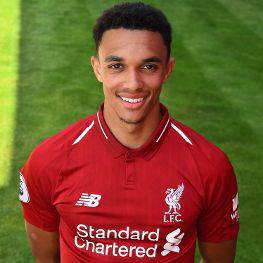

In [30]:
r1=requests.get(members[10].select_one('img')['src'])
img = Image.open(io.BytesIO(r1.content))
img

In [31]:
def save_img(imgfilename: str, contents):
    with open(imgfilename, 'wb') as f:
        f.write(contents)

In [32]:
members[:2]

[<li class="team-player-list-item">
 <a href="/team/first-team/player/alisson-becker">
 <div class="img-wrap">
 <img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg"/>
 </div>
 <div class="number">13</div>
 <div class="about">
 <div class="name">
 <span>Alisson</span> <span>Becker</span>
 </div>
 </div>
 </a>
 </li>, <li class="team-player-list-item">
 <a href="/team/first-team/player/simon-mignolet">
 <div class="img-wrap">
 <img alt="Simon Mignolet" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg"/>
 </div>
 <div class="number">22</div>
 <div class="about">
 <div class="name">
 <span>Simon</span> <span>Mignolet</span>
 </div>
 </div>
 </a>
 </li>]

In [33]:
lst=[]
# for e in members[:3]:
for e in members:
    mem_img_url=e.select_one('img')['src']
    mem_name=e.select_one('img')['alt']
    mem_number=e.select_one('div.number').text
    mem_link=f"https://www.liverpoolfc.com{e.select_one('a')['href']}"
    print(f'{mem_name} {mem_number} {mem_img_url} {mem_link}')
    lst.append([mem_name, mem_number, mem_img_url, mem_link])
#     r=requests.get(mem_img_url)
#     img = Image.open(io.BytesIO(r.content))
#     save_img(f'{mem_name}_{mem_number}.jpg', r.content)
#     img.show()
lst[:3]

Alisson Becker 13 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg https://www.liverpoolfc.com/team/first-team/player/alisson-becker
Simon Mignolet 22 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg https://www.liverpoolfc.com/team/first-team/player/simon-mignolet
Caoimhin Kelleher 62 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher
Virgil van Dijk 4 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70012_misc_general_500.jpeg https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk
Dejan Lovren 6 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71690_misc_general_500.jpeg https://www.liverpoolfc.com/team/first-team/player/dejan-lovren
Joe Gomez 12 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/

[['Alisson Becker',
  '13',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/team/first-team/player/alisson-becker'],
 ['Simon Mignolet',
  '22',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/team/first-team/player/simon-mignolet'],
 ['Caoimhin Kelleher',
  '62',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher']]

In [34]:
pd.options.display.max_colwidth = 0

In [35]:
df=pd.DataFrame(lst, columns=['name', 'number', 'img_url', 'link'])
df.head()

,name,number,img_url,link
0,Alisson Becker,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/alisson-becker
1,Simon Mignolet,22,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/simon-mignolet
2,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher
3,Virgil van Dijk,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70012_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk
4,Dejan Lovren,6,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71690_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/dejan-lovren


---

In [36]:
from IPython.display import HTML

In [37]:
def to_html_img(url, alt=None, width=100):
    if alt==None:
        alt=''
    return f'<img alt="{alt}" src="{url}" width="{width}"/>'

In [38]:
to_html_img('https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg')

'<img alt="" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg" width="100"/>'

In [39]:
df['img']=df.apply(lambda r: to_html_img(r['img_url'], r['name'], 100), axis=1)
df.head()

,name,number,img_url,link,img
0,Alisson Becker,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/alisson-becker,"<img alt=""Alisson Becker"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg"" width=""100""/>"
1,Simon Mignolet,22,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/simon-mignolet,"<img alt=""Simon Mignolet"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg"" width=""100""/>"
2,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher,"<img alt=""Caoimhin Kelleher"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg"" width=""100""/>"
3,Virgil van Dijk,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70012_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk,"<img alt=""Virgil van Dijk"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70012_misc_general_500.jpeg"" width=""100""/>"
4,Dejan Lovren,6,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71690_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/dejan-lovren,"<img alt=""Dejan Lovren"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71690_misc_general_500.jpeg"" width=""100""/>"


In [40]:
HTML(df[:5][['name', 'number', 'img']].to_html(escape=False))

,name,number,img
0,Alisson Becker,13,
1,Simon Mignolet,22,
2,Caoimhin Kelleher,62,
3,Virgil van Dijk,4,
4,Dejan Lovren,6,


In [41]:
def to_html_a(url, text):
    if text==None:
        text=''
    return f'<a href="{url}">{text}</a>'

In [42]:
to_html_a('https://www.liverpoolfc.com/team/first-team/player/alisson-becker', '<img alt="" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg" width="100"/>')

'<a href="https://www.liverpoolfc.com/team/first-team/player/alisson-becker"><img alt="" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg" width="100"/></a>'

In [43]:
df.head()

,name,number,img_url,link,img
0,Alisson Becker,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/alisson-becker,"<img alt=""Alisson Becker"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg"" width=""100""/>"
1,Simon Mignolet,22,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/simon-mignolet,"<img alt=""Simon Mignolet"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg"" width=""100""/>"
2,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher,"<img alt=""Caoimhin Kelleher"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg"" width=""100""/>"
3,Virgil van Dijk,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70012_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk,"<img alt=""Virgil van Dijk"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70012_misc_general_500.jpeg"" width=""100""/>"
4,Dejan Lovren,6,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71690_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/dejan-lovren,"<img alt=""Dejan Lovren"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71690_misc_general_500.jpeg"" width=""100""/>"


In [44]:
df['a']=df.apply(lambda r: to_html_a(r['link'], r['name']), axis=1)
df.head()

,name,number,img_url,link,img,a
0,Alisson Becker,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/alisson-becker,"<img alt=""Alisson Becker"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/alisson-becker"">Alisson Becker</a>"
1,Simon Mignolet,22,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/simon-mignolet,"<img alt=""Simon Mignolet"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/simon-mignolet"">Simon Mignolet</a>"
2,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher,"<img alt=""Caoimhin Kelleher"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher"">Caoimhin Kelleher</a>"
3,Virgil van Dijk,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70012_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk,"<img alt=""Virgil van Dijk"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70012_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk"">Virgil van Dijk</a>"
4,Dejan Lovren,6,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71690_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/dejan-lovren,"<img alt=""Dejan Lovren"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71690_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/dejan-lovren"">Dejan Lovren</a>"


In [45]:
HTML(df[:5][['name', 'number', 'img', 'a']].to_html(escape=False))

,name,number,img,a
0,Alisson Becker,13,,Alisson Becker
1,Simon Mignolet,22,,Simon Mignolet
2,Caoimhin Kelleher,62,,Caoimhin Kelleher
3,Virgil van Dijk,4,,Virgil van Dijk
4,Dejan Lovren,6,,Dejan Lovren


In [46]:
df['a2']=df.apply(lambda r: to_html_a(r['link'], r['img']), axis=1)
df.head()

,name,number,img_url,link,img,a,a2
0,Alisson Becker,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/alisson-becker,"<img alt=""Alisson Becker"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/alisson-becker"">Alisson Becker</a>","<a href=""https://www.liverpoolfc.com/team/first-team/player/alisson-becker""><img alt=""Alisson Becker"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg"" width=""100""/></a>"
1,Simon Mignolet,22,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/simon-mignolet,"<img alt=""Simon Mignolet"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/simon-mignolet"">Simon Mignolet</a>","<a href=""https://www.liverpoolfc.com/team/first-team/player/simon-mignolet""><img alt=""Simon Mignolet"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg"" width=""100""/></a>"
2,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher,"<img alt=""Caoimhin Kelleher"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher"">Caoimhin Kelleher</a>","<a href=""https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher""><img alt=""Caoimhin Kelleher"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg"" width=""100""/></a>"
3,Virgil van Dijk,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70012_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk,"<img alt=""Virgil van Dijk"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70012_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk"">Virgil van Dijk</a>","<a href=""https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk""><img alt=""Virgil van Dijk"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70012_misc_general_500.jpeg"" width=""100""/></a>"
4,Dejan Lovren,6,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71690_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/dejan-lovren,"<img alt=""Dejan Lovren"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71690_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/dejan-lovren"">Dejan Lovren</a>","<a href=""https://www.liverpoolfc.com/team/first-team/player/dejan-lovren""><img alt=""Dejan Lovren"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71690_misc_general_500.jpeg"" width=""100""/></a>"


In [47]:
HTML(df[:5][['number', 'a', 'a2']].to_html(escape=False))

,number,a,a2
0,13,Alisson Becker,
1,22,Simon Mignolet,
2,62,Caoimhin Kelleher,
3,4,Virgil van Dijk,
4,6,Dejan Lovren,


---

## save DataFrame

In [48]:
df.to_csv('liverpool_team.csv', index=False)

In [49]:
df.to_excel('liverpool_team.xlsx', index=False)

In [50]:
from sqlalchemy import create_engine

In [51]:
con = create_engine(f'sqlite:///liverpool_team.sqlite')

In [52]:
df.to_sql('player', con, if_exists='replace', index=False)

In [53]:
pd.read_sql('select * from player limit 3;', con)

,name,number,img_url,link,img,a,a2
0,Alisson Becker,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/alisson-becker,"<img alt=""Alisson Becker"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/alisson-becker"">Alisson Becker</a>","<a href=""https://www.liverpoolfc.com/team/first-team/player/alisson-becker""><img alt=""Alisson Becker"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg"" width=""100""/></a>"
1,Simon Mignolet,22,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/simon-mignolet,"<img alt=""Simon Mignolet"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/simon-mignolet"">Simon Mignolet</a>","<a href=""https://www.liverpoolfc.com/team/first-team/player/simon-mignolet""><img alt=""Simon Mignolet"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg"" width=""100""/></a>"
2,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher,"<img alt=""Caoimhin Kelleher"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher"">Caoimhin Kelleher</a>","<a href=""https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher""><img alt=""Caoimhin Kelleher"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg"" width=""100""/></a>"
